In [93]:
from src.dispersion import * 
from src.VSH import * 
from src.extra_special import * 
from src.fields import (
    E_,
    H_,
    E_cart_,
    H_cart_
)
from src.AM import *
from src.misc import *

import numpy as np
import scipy.constants as const
import scipy.special as sp
from scipy import integrate
from cxroots import Rectangle, AnnulusSector, Circle
import cxroots
from icecream import ic

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe  # for text effects 
plt.rcParams.update({'font.size': 18})

Z_0 = np.sqrt(const.mu_0 / const.epsilon_0)  # vacuum impedance

In [94]:
particle_type = "dielectric"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

n = 1  # m = -n, ..., n

a = 50*const.nano

mode_type = "TE"  # "TE" or "TM"

eps_out = 1
mu_out = 1

n_in = np.sqrt(eps_dielectric * mu_dielectric)
n_out = np.sqrt(eps_out * mu_out)

In [95]:
ka = 0.5

im_frac = np.linspace(0, stop=0.7, num=20)

ww = const.speed_of_light / a / np.sqrt(eps_out * mu_out) * ka * (1 - 1j*im_frac)

W = np.array([])
Jz = np.array([])
Lz = np.array([])
Sz = np.array([])

for omega in ww:
    k0 = omega / const.speed_of_light

    part = "both"

    n, m = 2, 2

    rmax = 10 * 2*np.pi/k0
    

    dr_NF = a/100
    dr_FF = 2*np.pi/(np.sqrt(eps_out*mu_out) * k0) / 100
    
    ic(int(2*a / dr_NF), int((rmax-2*a)/dr_FF))
    
    rr = np.append(
        np.linspace(1e-13, stop=2*a, num=int(2*a / dr_NF), endpoint=False),
        np.linspace(2*a, stop=rmax, num=int((rmax-2*a)/dr_FF))
    )
    tt = np.linspace(0, stop=np.pi, num=50)
    phi = 2.0
    
    W = np.append(
        W, 
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * W_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Jz = np.append(
        Jz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Jz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Lz = np.append(
        Lz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Lz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Sz = np.append(
        Sz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Sz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )

<ipython-input-95-82ee5234ef4a>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  ic(int(2*a / dr_NF), int((rmax-2*a)/dr_FF))
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
<ipython-input-95-82ee5234ef4a>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  np.linspace(2*a, stop=rmax, num=int((rmax-2*a)/dr_FF))
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 984
ic| int(2*a / dr_NF): 200, 

/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


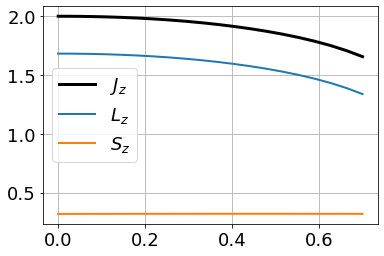

In [97]:
plt.plot(im_frac, np.real(ww)*Jz/W, c='k', lw=3, label='$J_z$')
plt.plot(im_frac, np.real(ww)*Lz/W, lw=2, label='$L_z$')
plt.plot(im_frac, np.real(ww)*Sz/W, lw=2, label='$S_z$')

#plt.plot(im_frac, 1-im_frac)

plt.legend()
plt.grid()
#plt.ylim(0.45, 0.55)
#plt.xlim(0, 0.1)

#plt.xlabel('Radius of integration sphere, $r_{max}/a$')

plt.show()

In [3]:
ka = 0.5
im_fracmega = const.speed_of_light / a / np.sqrt(eps_out * mu_out) * ka * (1 - 0.2j)
k0 = omega / const.speed_of_light

part = "both"

n, m = 1, 1

rrmax = np.linspace(10*a, stop=40/k0, num=20)
W = np.array([])
W_analit = np.array([])

Jz = np.array([])
Lz = np.array([])
Sz = np.array([])

dr_NF = a/100
dr_FF = 2*np.pi/(np.sqrt(eps_out*mu_out) * k0) / 100

for rmax in rrmax:
    ic(int(2*a / dr_NF), int((rmax-2*a)/dr_FF))
    
    rr = np.append(
        np.linspace(1e-13, stop=2*a, num=int(2*a / dr_NF), endpoint=False),
        np.linspace(2*a, stop=rmax, num=int((rmax-2*a)/dr_FF))
    )
    tt = np.linspace(0, stop=np.pi, num=50)
    phi = 2.0
    
    W = np.append(
        W, 
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * W_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Jz = np.append(
        Jz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Jz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Lz = np.append(
        Lz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Lz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Sz = np.append(
        Sz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Sz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )

<ipython-input-3-8b75c1b8a404>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  ic(int(2*a / dr_NF), int((rmax-2*a)/dr_FF))
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 63
<ipython-input-3-8b75c1b8a404>:26: ComplexWarning: Casting complex values to real discards the imaginary part
  np.linspace(2*a, stop=rmax, num=int((rmax-2*a)/dr_FF))
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 92
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 122
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 151
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 180
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 210
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 239
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 268
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 298
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 327
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 356
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 386
ic| int(2*a / dr_NF): 200, int(

/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


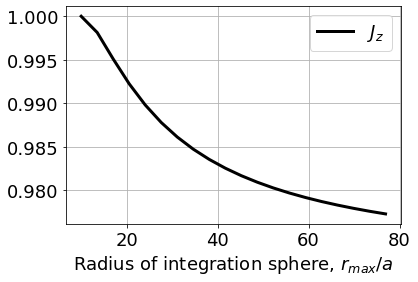

In [6]:
plt.plot(rrmax/a, np.real(omega)*Jz/W, c='k', lw=3, label='$J_z$')

#plt.plot(rrmax/a, np.real(omega)*Lz/W, lw=2, label='$L_z$')
#plt.plot(rrmax/a, np.real(omega)*Sz/W, lw=2, label='$S_z$')

plt.legend()
plt.grid()
#plt.ylim(0, 1)

plt.xlabel('Radius of integration sphere, $r_{max}/a$')

plt.show()

In [9]:
1 + np.imag(omega)/np.real(omega)

0.8

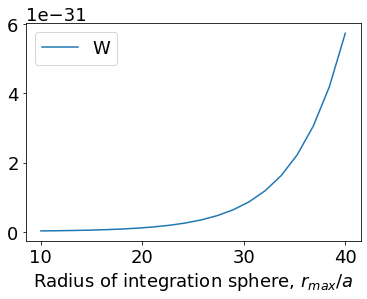

In [60]:
plt.plot(rrmax/a, W, label='W')
plt.legend()
plt.xlabel('Radius of integration sphere, $r_{max}/a$')
plt.show()

In [38]:
W = np.array([], dtype=float)
Jz = np.array([], dtype=float)
Lz = np.array([], dtype=float)
Sz = np.array([], dtype=float)


particle_type = "dielectric"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

n = 1  # m = -n, ..., n

a = 50*const.nano

mode_type = "TE"  # "TE" or "TM"

eps_out = 1
mu_out = 1

n_in = np.sqrt(eps_dielectric * mu_dielectric)
n_out = np.sqrt(eps_out * mu_out)


xx = np.linspace(0.01, stop=0.4, num=20)
ww = const.speed_of_light/np.sqrt(eps_out * mu_out) * 1/a * xx

for omega in ww:
    k0 = omega / const.speed_of_light
    k_host = np.sqrt(eps_out*mu_out) * k0
    k_in = np.sqrt(eps_dielectric * mu_dielectric) * k0

    part = "both"

    n, m = 1, 1

    rmax = 2*np.pi / k_host * 40

    dr_NF = np.min([2*np.pi/np.real(k_in), a]) / 70
    dr_FF = 2*np.pi/np.real(k_host) / 50
    
    ic(int(2*a / dr_NF), int((rmax-2*a)/dr_FF))
    
    rr = np.append(
        np.linspace(1e-13, stop=2*a, num=int(2*a / dr_NF), endpoint=False),
        np.linspace(2*a, stop=rmax, num=int((rmax-2*a)/dr_FF))
    )
    tt = np.linspace(0, stop=np.pi, num=50)
    phi = 2.0
    
    W = np.append(
        W, 
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * W_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Jz = np.append(
        Jz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Jz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Lz = np.append(
        Lz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Lz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Sz = np.append(
        Sz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Sz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )

ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1999
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1999
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1999
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1998
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1998
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1998
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1997
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1997
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1997
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1996
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1996
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1996
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1995
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1995
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1995
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1994
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1994
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1994
ic| int(2*

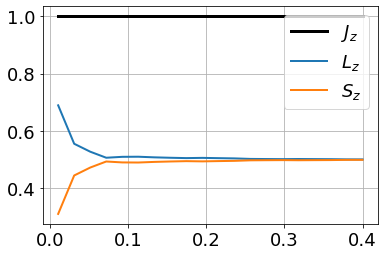

In [39]:
plt.plot(xx, ww*Jz/W, c='k', lw=3, label='$J_z$')

plt.plot(xx, ww*Lz/W, lw=2, label='$L_z$')
plt.plot(xx, ww*Sz/W, lw=2, label='$S_z$')

#plt.xscale('log')
plt.legend()
plt.grid()
#plt.ylim(0, 3)

plt.show()

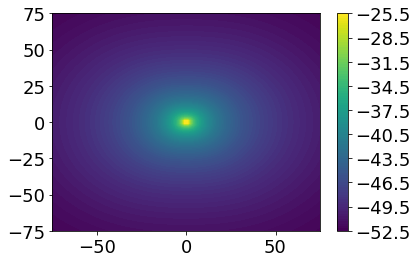

In [51]:
ka = 0.01

omega = const.speed_of_light / a / np.sqrt(eps_out * mu_out) * ka

N = 100
boxSize = 75*a

part = "both"

n = 1
m = 1

xx = np.linspace(-boxSize, stop=boxSize, num=N)
y = 0
zz = np.linspace(-boxSize, stop=boxSize, num=N)


X, Z = np.meshgrid(xx, zz, sparse=False, indexing='ij')

R, THETA, PHI = cart2sph(X, y, Z)

W = W_(
    m, n, 
    R, THETA, PHI, 
    mode_type, a, omega, particle_type, 
    eps_out, mu_out, eps_dielectric, mu_dielectric, part=part
)
plt.contourf(X/a, Z/a, np.log(W), cmap='viridis', levels=90)
plt.colorbar()
plt.show()

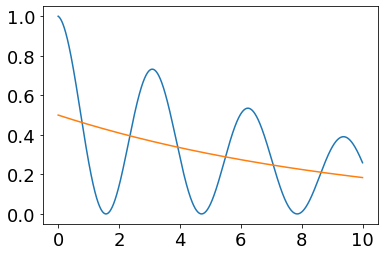

In [25]:
def A(t, omega):
    return np.real(np.exp(-1j*omega*t))

omega = 1 - 0.05j

t = np.linspace(0, stop=10, num=3000)

plt.plot(t, A(t, omega) * A(t, omega))
plt.plot(t, 0.5*np.exp(2*np.imag(omega)*t))

plt.show()

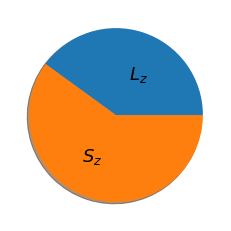

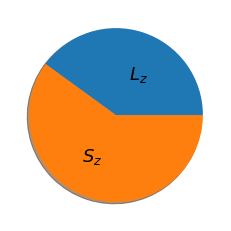

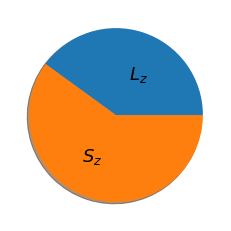

In [26]:
nmax = 1

sizes = [0.4, 0.6]
lbls = ['$L_z$', '$S_z$']

for n in range(1, nmax+1):
    for m in range(-n, n+1):
        plt.pie(sizes, labels=lbls, shadow=True, labeldistance=0.5)
        plt.show()

In [156]:
def getszlz_nm(n, m):
    particle_type = "dielectric"  # "dielectric" or "metallic"
    eps_dielectric = 10 + 0.0j
    mu_dielectric = 1.0 + 0.0j

    a = 50*const.nano

    mode_type = "TE"  # "TE" or "TM"

    eps_out = 1
    mu_out = 1

    n_in = np.sqrt(eps_dielectric * mu_dielectric)
    n_out = np.sqrt(eps_out * mu_out)
    
    ka = 1.1

    omega = const.speed_of_light / a / np.sqrt(eps_out * mu_out) * ka * (1 - 0.0j)

    k0 = omega / const.speed_of_light

    part = "both"

    rmax = 10 * np.real(2*np.pi/k0)
    
    dr_NF = a/50
    dr_FF = np.real(2*np.pi/(np.sqrt(eps_out*mu_out) * k0) / 50)
    
    #ic(
    #    int(2*a / dr_NF), 
    #    int((rmax-2*a)/dr_FF),
    #    dr_NF,
    #    dr_FF
    #)
    
    rr = np.append(
        np.linspace(1e-13, stop=2*a, num=int(2*a / dr_NF), endpoint=False),
        np.linspace(2*a, stop=rmax, num=int((rmax-2*a)/dr_FF))
    )
    tt = np.linspace(0, stop=np.pi, num=70)
    phi = 2.0
    
    W = nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * W_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
    )
    
    Jz = nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Jz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
    )
    
    Lz = nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Lz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
    )
    
    Sz = nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Sz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
    )
    
    return np.real(np.real(omega)*Sz/W), np.real(np.real(omega)*Lz/W)

In [157]:
getszlz_nm(3, 2)

(0.14600574069951244, 1.8539942593004872)

In [158]:
getszlz(1, 1)

ic| int(2*a / dr_NF): 200
    int((rmax-2*a)/dr_FF): 1984
    dr_NF: 5e-10
    dr_FF: 6.283185307179588e-09


(0.4992408380436233, 0.5007591619563766)

ic| n: 1
    m+1: 1
    sizes: [0.5005197882873527, 0.4994802117126474]
    sz/(sz+lz): 0.5005197882873527
ic| n: 2
    m+1: 1
    sizes: [0.16471512533733232, 0.8352848746626677]
    sz/(sz+lz): 0.16471512533733232
ic| n: 2
    m+1: 2
    sizes: [0.3294351745230929, 1.6705648254769068]
    sz/(sz+lz): 0.16471758726154648
ic| n: 3
    m+1: 1
    sizes: [0.07299757166144338, 0.9270024283385567]
    sz/(sz+lz): 0.07299757166144338
ic| n: 3
    m+1: 2
    sizes: [0.14600574069951244, 1.8539942593004872]
    sz/(sz+lz): 0.07300287034975624
ic| n: 3
    m+1: 3
    sizes: [0.2190061505940638, 2.780993849405935]
    sz/(sz+lz): 0.0730020501980213
ic| n: 4
    m+1: 1
    sizes: [0.03546666066628351, 0.9645333393337164]
    sz/(sz+lz): 0.03546666066628351
ic| n: 4
    m+1: 2
    sizes: [0.07095509503523102, 1.9290449049647689]
    sz/(sz+lz): 0.03547754751761551
ic| n: 4
    m+1: 3
    sizes: [0.10642700211753432, 2.8935729978824645]
    sz/(sz+lz): 0.035475667372511455
ic| n: 4
    m+1: 4
    

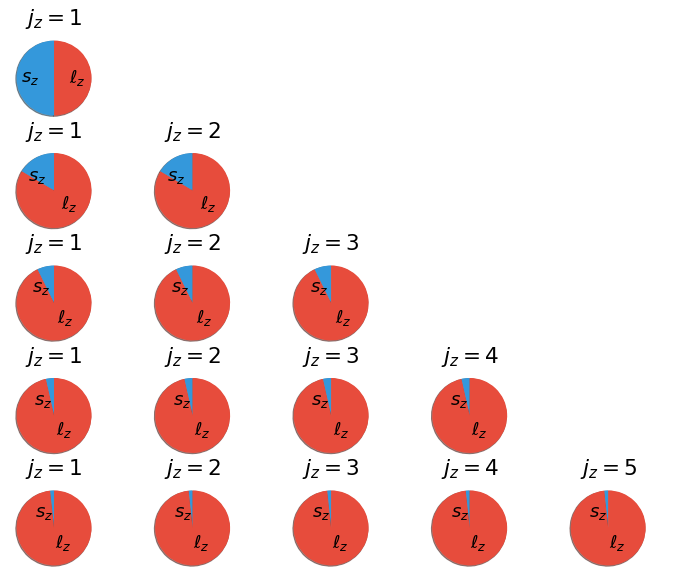

In [159]:
nmax = 5

#sizes = [0.4, 0.6]
lbls = ['$s_z$', '$\ell_z$']
colors = ['#3498DB', '#E74C3C']

fig, axs = plt.subplots(nmax, nmax, figsize=(12, 10))

for n in range(1, nmax+1):
    for m in range(n, nmax):
        axs[n-1, m].axis('off')
    for m in range(0, n):
        sz, lz = getszlz_nm(n, m+1)
        sizes = [sz, lz]
        ic(n, m+1, sizes, sz/(sz+lz))
        axs[n-1, m].set_title('$j_z=$' + str(m+1))
        axs[n-1, m].pie(sizes, labels=lbls, shadow=True, colors=colors, labeldistance=0.4, startangle=90)

#fig.tight_layout()
plt.show()

ic| n: 1, m+1: 1, sizes: [1, 4]
ic| n: 2, m+1: 1, sizes: [1, 9]
ic| n: 2, m+1: 2, sizes: [1, 9]
ic| n: 3, m+1: 1, sizes: [1, 16]
ic| n: 3, m+1: 2, sizes: [1, 16]
ic| n: 3, m+1: 3, sizes: [1, 16]
ic| n: 4, m+1: 1, sizes: [1, 25]
ic| n: 4, m+1: 2, sizes: [1, 25]
ic| n: 4, m+1: 3, sizes: [1, 25]
ic| n: 4, m+1: 4, sizes: [1, 25]
ic| n: 5, m+1: 1, sizes: [1, 36]
ic| n: 5, m+1: 2, sizes: [1, 36]
ic| n: 5, m+1: 3, sizes: [1, 36]
ic| n: 5, m+1: 4, sizes: [1, 36]
ic| n: 5, m+1: 5, sizes: [1, 36]


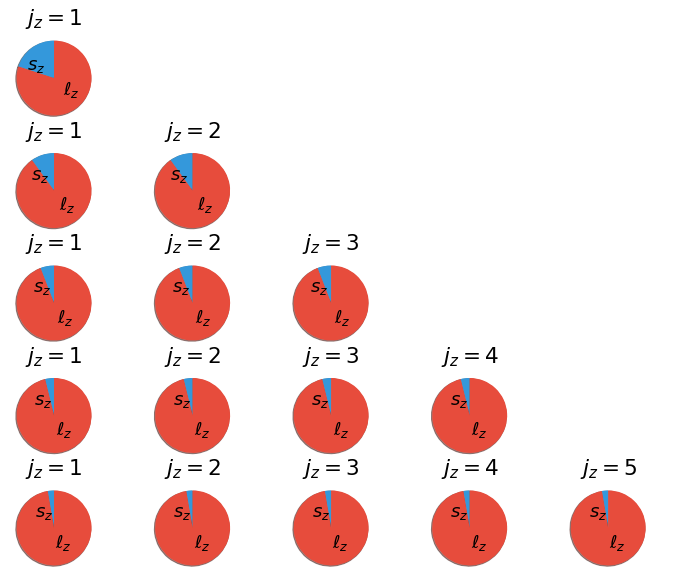

In [143]:
nmax = 5

#sizes = [0.4, 0.6]
lbls = ['$s_z$', '$\ell_z$']
colors = ['#3498DB', '#E74C3C']

fig, axs = plt.subplots(nmax, nmax, figsize=(12, 10))

for n in range(1, nmax+1):
    for m in range(n, nmax):
        axs[n-1, m].axis('off')
    for m in range(0, n):
        sz, lz = [1, (n+1)**2] #getszlz_nm(n, m+1)
        sizes = [sz, lz]
        ic(n, m+1, sizes)
        axs[n-1, m].set_title('$j_z=$' + str(m+1))
        axs[n-1, m].pie(sizes, labels=lbls, shadow=True, colors=colors, labeldistance=0.4, startangle=90)

#fig.tight_layout()
plt.show()